## Изучение поведения клиентов фитнес-центров и прогнозирование их оттока 

## План выполнения проекта:
<br>Шаг 1. [Загрузка данных](#step1)
<br>Шаг 2. [Проведение исследовательского анализа данных (EDA)](#step2)
<br>Шаг 3. [Построение модели прогнозирования оттока клиентов](#step3)
<br>Шаг 4. [Кластеризация клиентов](#step4)
<br>Шаг 5. [Выводы и рекомендации по работе с клиентами](#step5)    

## Шаг 1. Загрузка данных <a id="step1"></a>

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

Загрузим данные, изучим их и подготовим к анализу

In [2]:
data = pd.read_csv('C:\\datasets\\gym_churn.csv')
data = data.drop_duplicates()
data.info()
display(data.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Данные подготовлены к анализу, нет дубликатов и пропусков, тип данных указан верно

## Шаг 2. Проведение исследовательского анализа данных (EDA) <a id="step2"></a>

##### Посмотрим на значения признаков, изучим среднее и стандартное отклонение

In [3]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Среднестатистический клиент фитнесс-центра это парень или девушка 26 - 32 лет, проживающий либо работающий в непосредственной близости от зала, который занимается по абонементу менее полугода.

##### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [4]:
data_churn0 = data[data['Churn']== 0]
data_churn0.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


In [5]:
data_churn1 = data[data['Churn']== 1]
data_churn1.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


##### Построим столбчатые гистограммы распределения признаков для обеих групп:


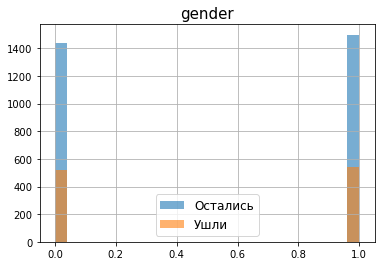

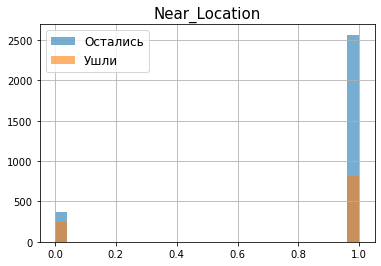

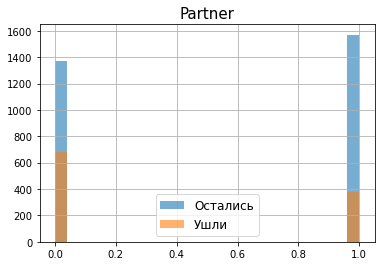

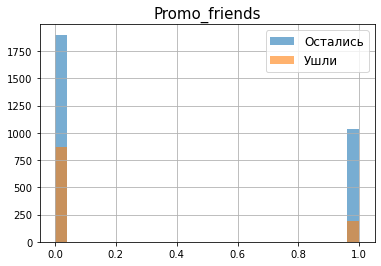

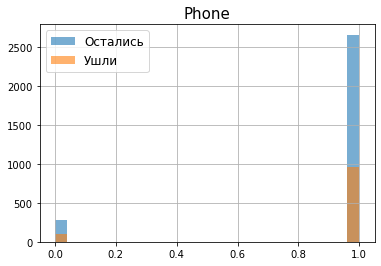

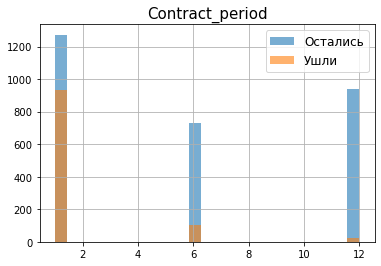

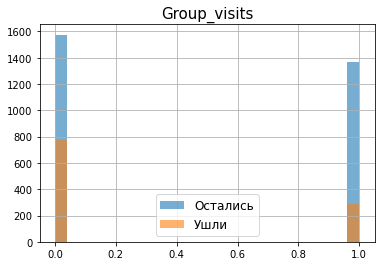

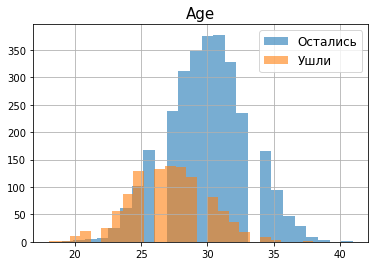

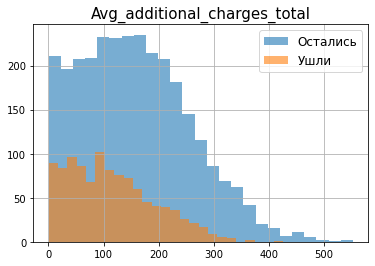

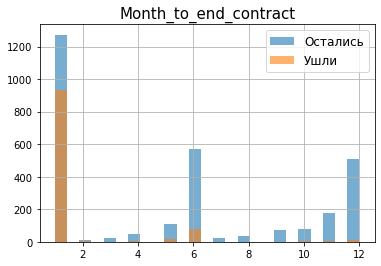

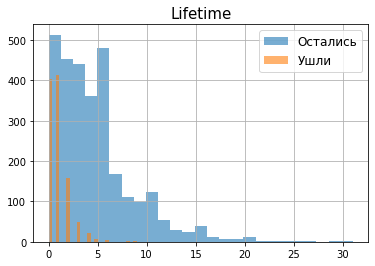

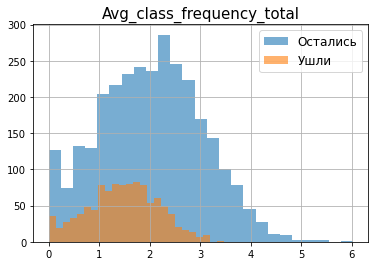

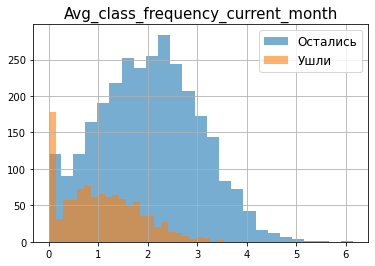

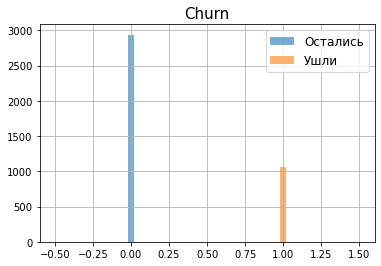

In [6]:
for column in data.columns:
    data.groupby('Churn')[column].hist(figsize=(6,4), bins=25, alpha=0.6)
    plt.title(column, fontsize = 15)
    plt.legend(['Остались', 'Ушли'], fontsize = 12)
    plt.show()

Из графиков можно сделать следующие выводы:
- пол клиента не влияет на вероятность оттока;
- ушедшие клиенты, в среденем, младше оставшихся;    
- расположение зала в районе проживания клиента, и работа клиента в компании-партнере, заметно увеличивает шанс удержания клиента;
- клиенты с длительными абониментами продолжат заниматься с большей вероятностью;
- клиенты, мало посещавшие зал в последнем месяце, скорее прикратят занятия.

##### Построим матрицу корреляции признаков

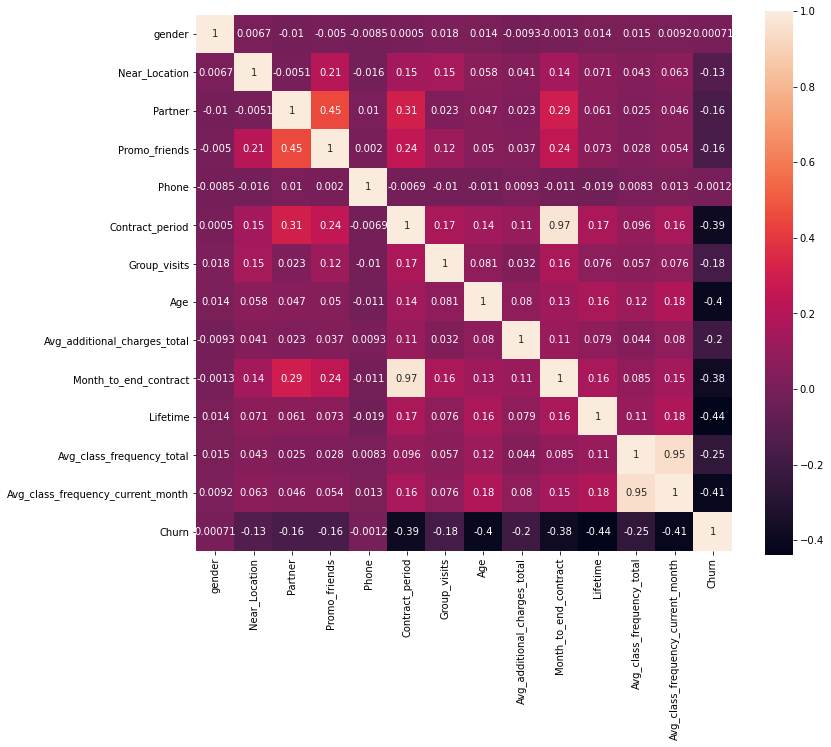

In [7]:
cm = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot = True, square=True)
plt.show()

Мы видим, что некоторые признаки сильно коррелируют между собой, также есть признаки "phone" и  "gender" абсолютно не коррелирующие с показателем оттока. Такие признаки будет правильнее извлечь из данных, для корректного построения моделей.

In [8]:
data = data.drop(['Month_to_end_contract', 'Avg_class_frequency_total'], axis=1)

## Шаг 3. Построение модели прогнозирования оттока клиентов<a id="step3"></a>

##### Разобьем данные на обучающую и валидационную выборку:

Разделим наши данные на признаки и целевую переменную:

In [9]:
X = data.drop('Churn', axis=1)
y = data['Churn']

Разделяем модель на обучающую и валидационную выборки:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y)

##### Обучим модель на train-выборке двумя способами:

Логистической регрессией:

In [11]:
lg_model = LogisticRegression(random_state = 0)
lg_model.fit(X_train, y_train)
lg_predictions = lg_model.predict(X_test)

Случайным лесом:

In [12]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

##### Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке.

Напишем функцию для расчета метрик:

In [13]:
def metrics(predictions):
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
    print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Расчитаем метрики для модели логистической регрессии:

In [14]:
metrics(lg_predictions)

Accuracy: 0.90
Precision: 0.81
Recall: 0.82
F1: 0.81


Расчитаем метрики для модели случайного леса:

In [15]:
metrics(rf_predictions)

Accuracy: 0.90
Precision: 0.85
Recall: 0.77
F1: 0.81


Как мы можем видеть из значений метрик отличаются незначительно, для предсказания можно выбрать любую из моделей. Мы возьмем Логистическую регрессию, так как её показатели немного лучше. 

## Шаг 4. Кластеризация клиентов<a id="step4"></a>

Удалим из данных столбец с информацией об оттоке, он нам не пригодится для кластеризации:

In [16]:
new_data = data.drop('Churn', axis=1)

##### Стандартизируем данные:

In [17]:
sc = StandardScaler()
X_sc = sc.fit_transform(new_data)

##### Построим матрицу расстояний и нарисуем дендрограмму:

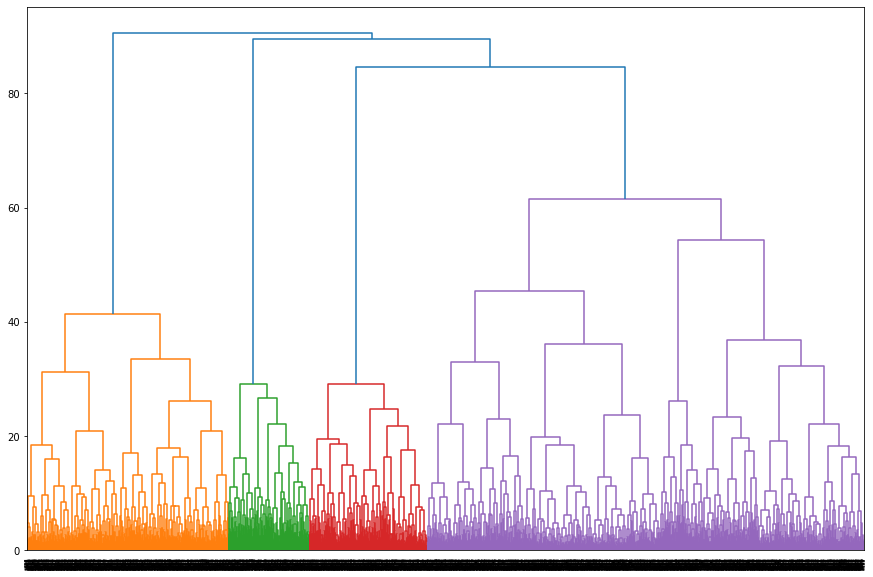

In [18]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

На основании дендрограммы логичным видется выделение 4х или 5ти кластеров, в задании нас попросили выделить 5, так и сделаем.

##### Обучим модель кластеризации

In [19]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)
new_data['cluster'] = labels

##### Посмотрим на средние значения признаков для кластеров

In [20]:
display(new_data.groupby('cluster').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month
cluster,,,,,,,,,,,
0,0.490654,1.000000,0.217757,0.070093,1.0,2.047664,0.289720,27.673832,117.271746,1.935514,1.182898
1,0.495943,0.995943,0.891481,1.000000,1.0,6.911765,0.523327,29.601420,153.355426,4.281947,1.919083
2,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967
3,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146
4,0.546000,0.996000,0.380000,0.011000,1.0,6.204000,0.528000,30.627000,178.905160,5.425000,2.353631


###### Уже сразу брасаются в глаза некоторые особенности посетителей из разных кластеров:
<p> - все клиенты из 4ого кластера не работают и не проживают рядом с фитнесс клубом;
<p> - все клиенты из первого кластера не оставили номера телефона;
<p> - почти все клиенты кластера 0 работают в компаниях-партнерах.    

##### Построим распределение признаков для кластеров:

Добавим информацию о кластере в исходную таблицу:

In [21]:
data = data.merge(new_data['cluster'], left_index=True, right_index=True)
display(data.head())
#создадим список с не бинарными признаками
columns1 = {'Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month'}

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month,Churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0,2
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0,4
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0,1
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0,1


Построим графики:

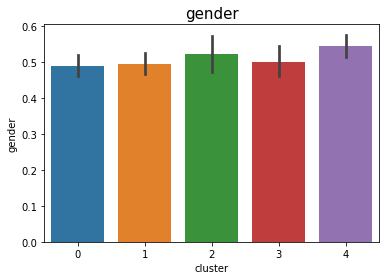

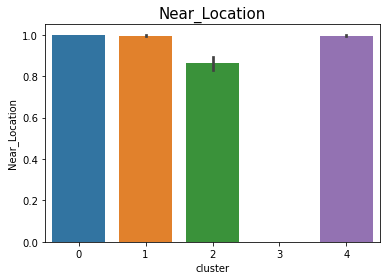

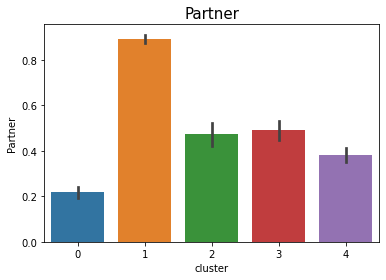

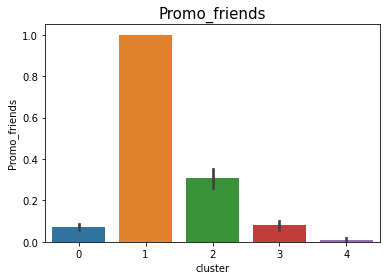

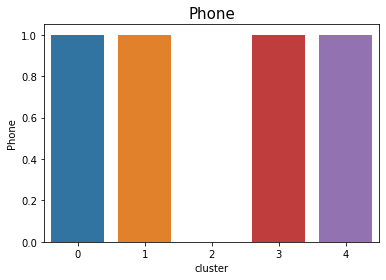

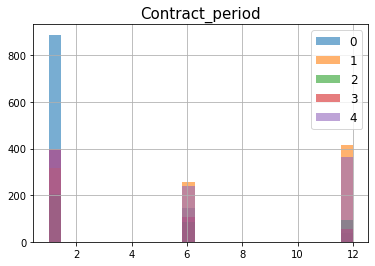

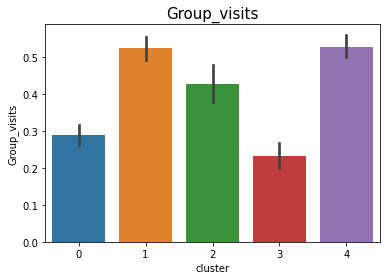

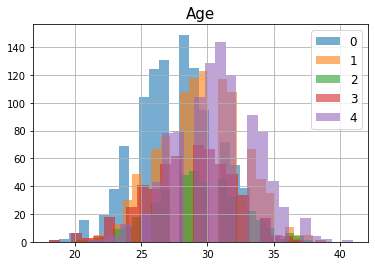

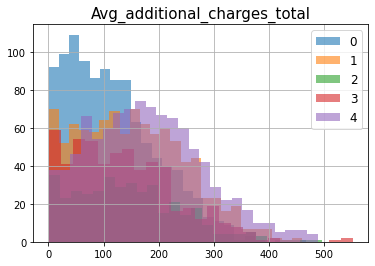

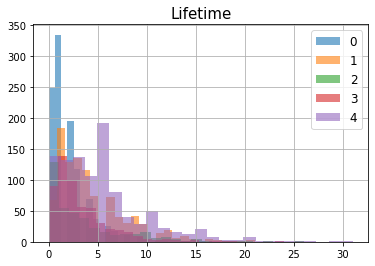

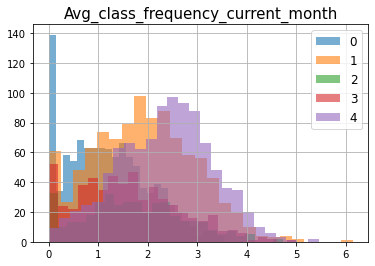

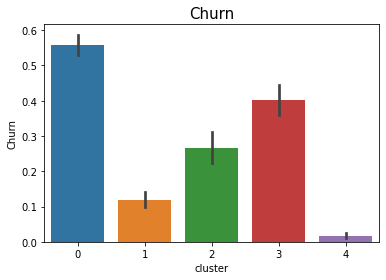

In [22]:
for column in data.columns:
    if column in columns1:
        data.groupby('cluster')[column].hist(figsize=(6,4),bins=25, alpha=0.6)
        plt.title(column, fontsize = 15)
        plt.legend(['0', '1', '2', '3', '4'], fontsize = 12)
        plt.show()
    else:
        if column != 'cluster':
            sns.barplot(x= 'cluster', y= column, data=data)
            plt.title(column, fontsize = 15)
            plt.show()

Выявим явные отличия некоторых кластеров:
<p> - 100% клиентов из кластера 1 не живут и не работают около фитнес-центра;
<p> - 100% клиентов из 0 кластера пришли по приглашению;
<p> - большинство клиентов из 2 кластера пользуются месячным абониментом;
<p> - клиенты 2 кластера,в среднем, заметно моложе остальных и тратят меньше денег на доп. услуги;
<p> - клиенты 3-ого кластера посещают занятия чаще других.    

##### Посчитаем долю оттока для каждого из кластеров:

In [23]:
display(data.groupby('cluster')['Churn'].mean())
data['Churn'].mean()

cluster
0    0.558879
1    0.119675
2    0.266839
3    0.403226
4    0.017000
Name: Churn, dtype: float64

0.26525

Как мы видим, наиболее склонны к оттоку посетители из кластера 2 (56% оттока в прошлом месяце) и из кластера 1 (40% оттока за месяц). Наименее подвежанны оттоку клиенты из 3-ого кластера (1,5%). 

## Шаг 5. Выводы и базовые рекомендации<a id="step5"></a>

##### Можно выделить несколько основных характеристик, заметно влияющих на отток клиентов:
<p> 1. Расположение фитнесс-клуба в непосредственной близости от места проживания или работы клиента, положительно сказывается на удержании клиента;
<p> 2. Если клент является сотрудником компании-партнера или его привел друг, шанс, что он продолжит занятия выше;
<p> 3. Покупка длительного абонимента значительно уменьшает вероятность оттока;
<p> 4. Молодые посетители более склонны к оттоку, чем более возрастные;
<p> 5. Часто посещающие спортзал клиенты и клиенты тратящие больше денег на доп. услуги с меньшей вероятностью прекратят занятия;
    

##### Рекомендации по  удержанию клиентов:
<p> - открывать больше фитнес-центров в густо населенных спальных районах и рядом с крупными офисами;
<p> - находить больше компаний партнеров, проводить больше акций для друзей и коллег;
<p> - стимулировать клиентов на покупку долгосрочных абонементов;
<p> - улучшать качество обслуживания и предлагать как можно больше дополнительных услуг.    